In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC

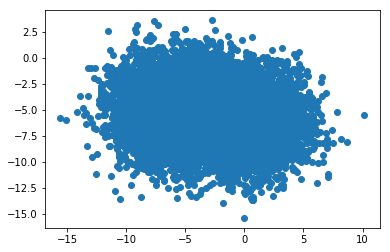

In [2]:
blobs, labels = make_blobs(n_samples=10000, centers=2, cluster_std=2.5)
plt.scatter(blobs[:, 0], blobs[: ,1])

In [3]:
blobs_train, blobs_test, labels_train, labels_test = train_test_split(blobs, labels, train_size=0.3)

In [4]:
perception = Perceptron()
perception.fit(blobs_train, labels_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [5]:
perception.score(blobs_train, labels_train)

0.8763333333333333

In [6]:
perception.score(blobs_test, labels_test)

0.87857142857142856

In [7]:
confusion_matrix(labels_test, perception.predict(blobs_test))

array([[3022,  467],
       [ 383, 3128]])

In [8]:
###

In [9]:
mnist = pd.read_csv("03mnist/train.csv")

In [10]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
mnist_data, _, mnist_labels, __ = train_test_split(mnist.drop("label", axis=1), mnist.label, train_size=0.2)
mnist_train, mnist_test, labels_train, labels_test = train_test_split(mnist_data, mnist_labels, train_size=0.7)
print(mnist_train.shape)
print(mnist_test.shape)

(5880, 784)
(2520, 784)


In [12]:
nn = MLPClassifier()
nn.fit(mnist_train, labels_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [13]:
print(nn.score(mnist_test, labels_test))
print(nn.score(mnist_train, labels_train))

0.904761904762
0.994387755102


In [14]:
nn2 = MLPClassifier(hidden_layer_sizes=(33,33,33))
nn2.fit(mnist_train, labels_train)
print(nn2.score(mnist_test, labels_test))
print(nn2.score(mnist_train, labels_train))

0.889682539683
0.962925170068


In [15]:
nn3 = MLPClassifier(hidden_layer_sizes=(20,30,20))
nn3.fit(mnist_train, labels_train)
print(nn3.score(mnist_test, labels_test))
print(nn3.score(mnist_train, labels_train))

0.848412698413
0.947619047619


In [16]:
# svm = SVC()
# # nn_search = MLPClassifier()
# params = {"C": 10.0 ** - np.arange(-3,5)}
# search = GridSearchCV(svm, params, cv=5)
# search.fit(mnist_train, labels_train)
# print(search.best_estimator_)